Analysing the customer database to better understand the purchasing trends among customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the data
df = pd.read_csv("C:/Users/asus/Desktop/Diwali Sales Data.csv" , encoding = "unicode_escape")


# DATA CLEANING

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'],axis=1 , inplace = True)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df["Amount"] = df["Amount"].astype('int')

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYTICS

GENDER

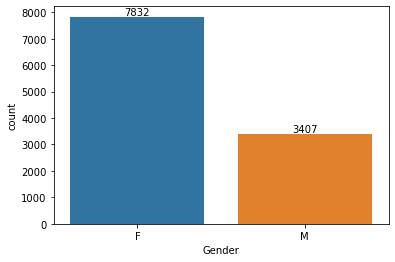

In [15]:
a=sns.countplot(x='Gender', data = df)

for i in a.containers:
    a.bar_label(i)


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

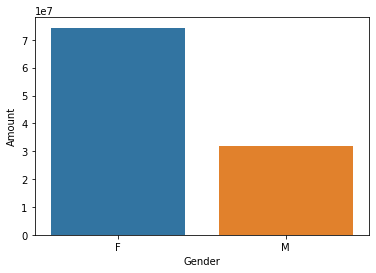

In [16]:
gender_sales = df.groupby(['Gender'],as_index =False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender', y='Amount', data = gender_sales)

In [17]:
df.groupby(['Gender'])['Amount'].sum()


Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

Here it is understood that female customers buy more products as compare to male customers and have got higher purchasing power.



AGE

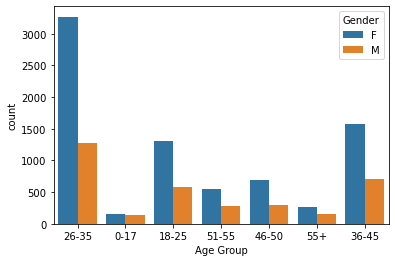

In [18]:
a = sns.countplot(x='Age Group' , data = df,hue = 'Gender')

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

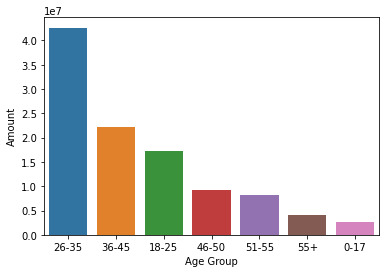

In [19]:
age_sales = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group' , y='Amount' , data = age_sales)

Most of the customers are Female between the age group 26-35.


OCCUPATION

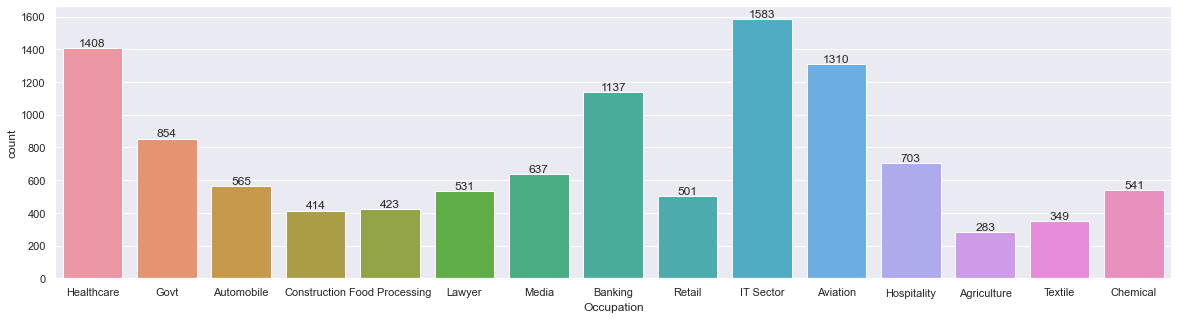

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for i in ax.containers:
    ax.bar_label(i)


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

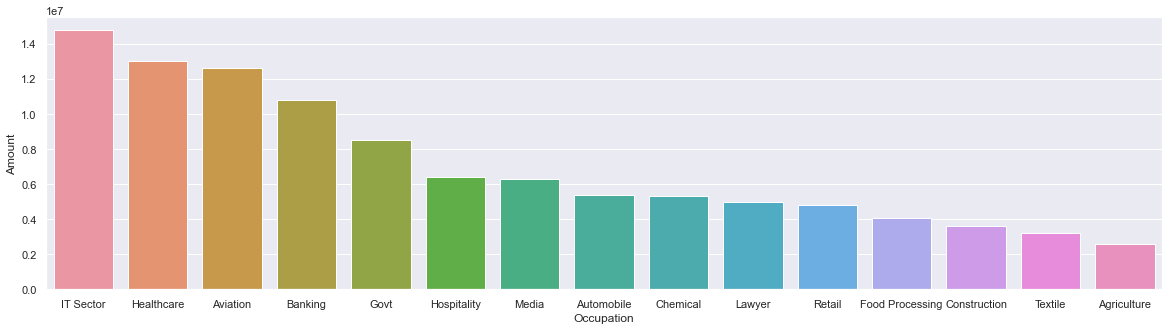

In [21]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

4)Most of the customers work in IT sector,Healthcare,Aviation and have higher purchasing power.



MARITAL STATUS

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

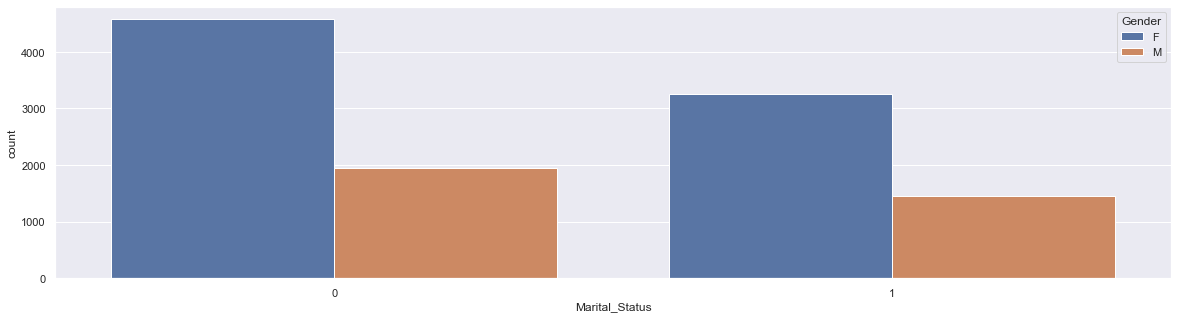

In [22]:
sns.countplot(data = df ,x = 'Marital_Status', hue = 'Gender')

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

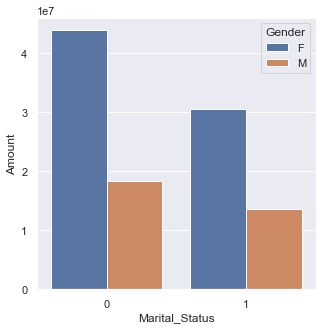

In [23]:
marital_sales = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data =marital_sales, x ='Marital_Status', y='Amount',hue = "Gender")

Most of the customers are unmaried(female) and have higher purchaseing power.

STATE

<AxesSubplot:xlabel='State', ylabel='count'>

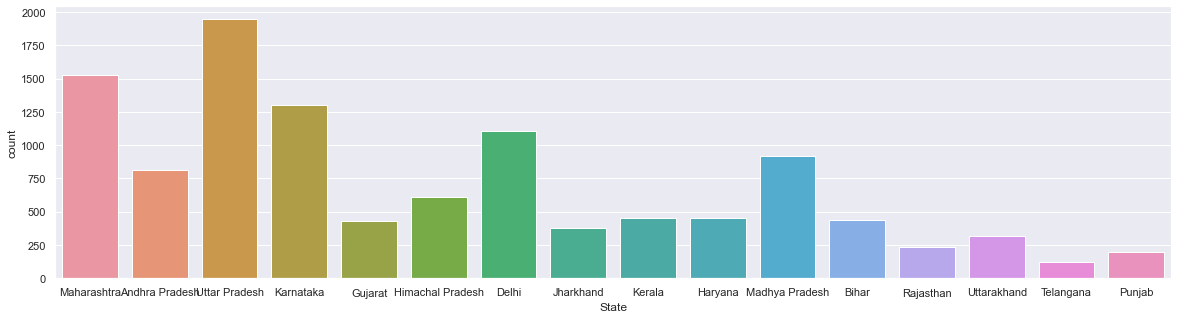

In [24]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.countplot(data = df , x='State')

<AxesSubplot:xlabel='State', ylabel='Orders'>

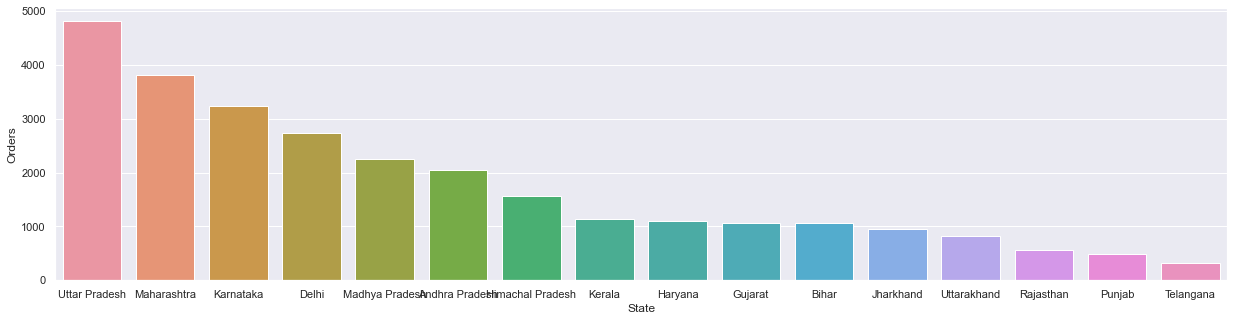

In [25]:
state_orders = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False)
sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = state_orders , x='State', y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

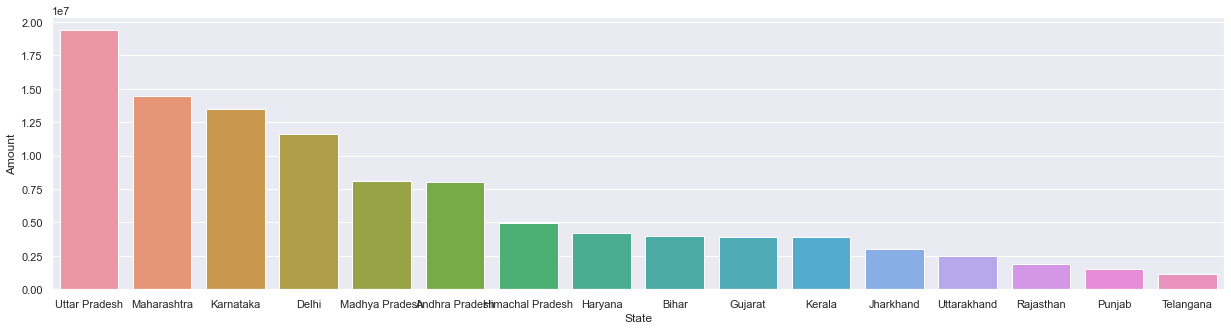

In [26]:
state_amount = df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = state_amount, x='State',y='Amount')

Most of the customers are from UP,Maharastra,Karnataka.

PRODUCT CATEGORY

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

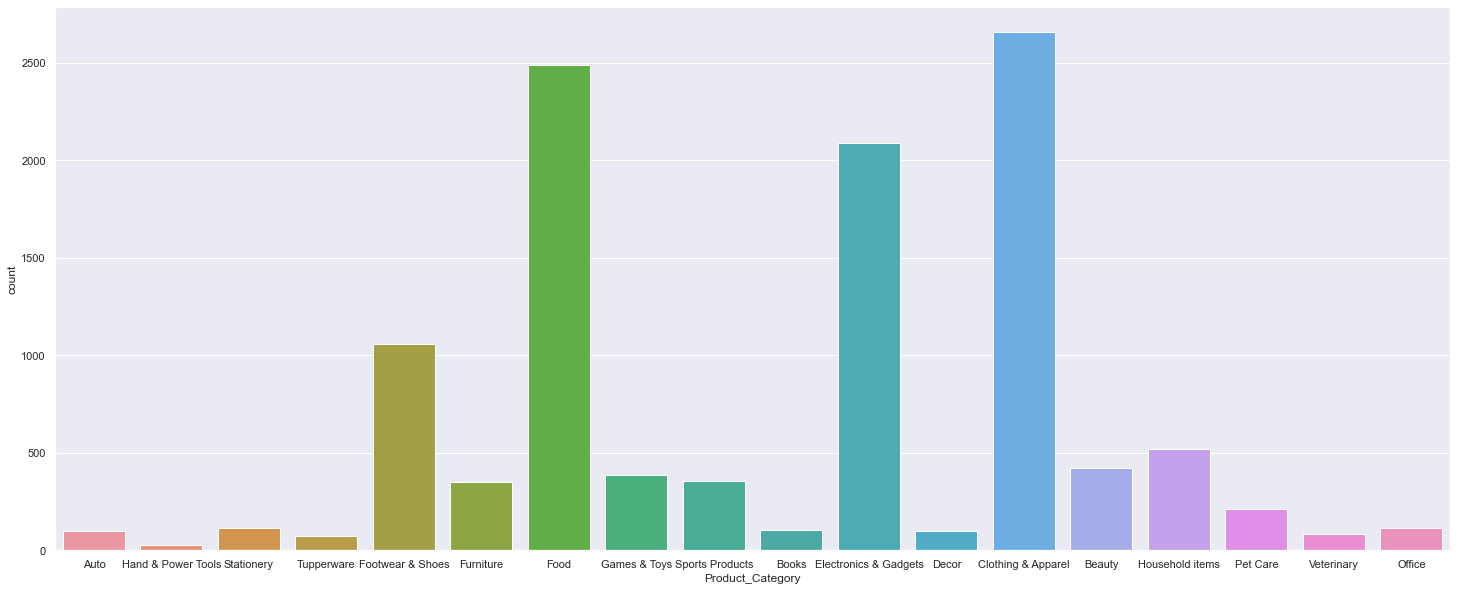

In [27]:
sns.set(rc={'figure.figsize':(25,10)})
sns.countplot(data = df , x='Product_Category')


<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

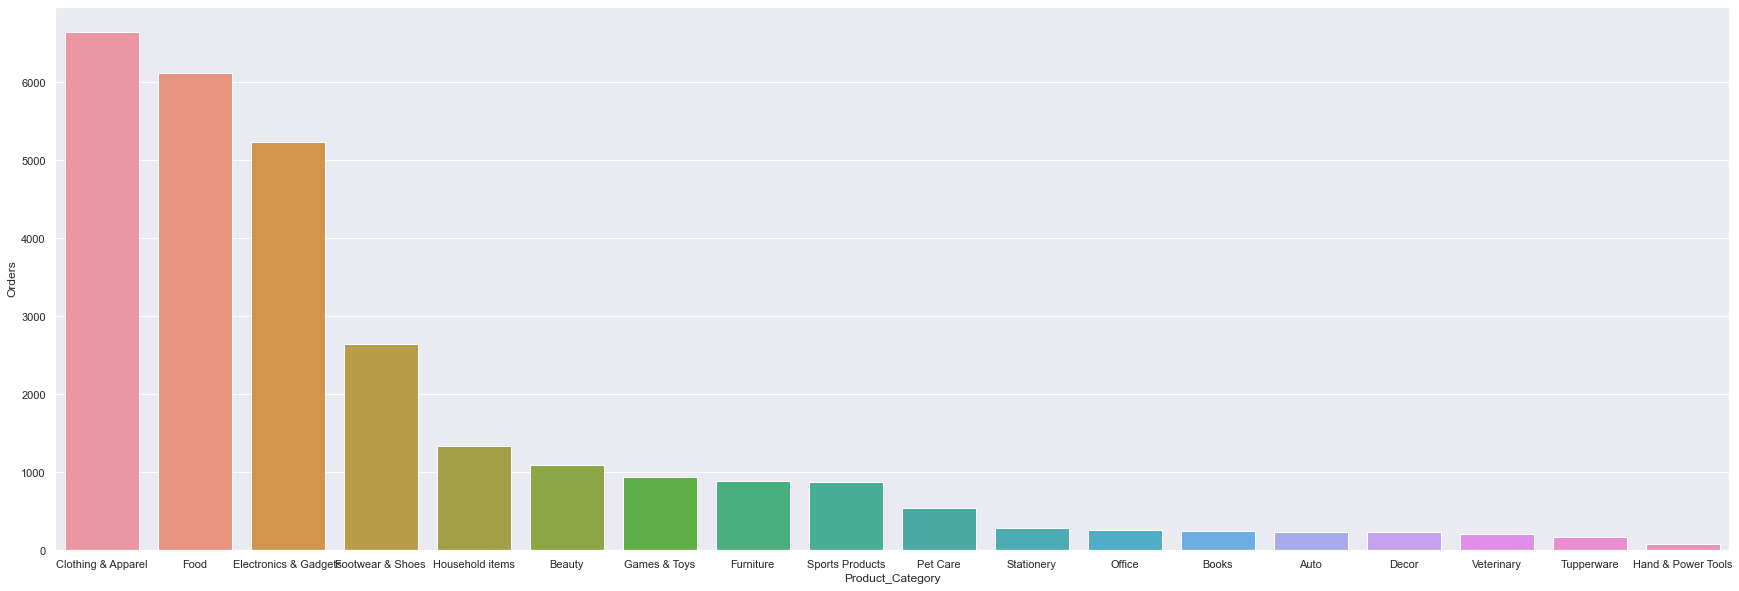

In [28]:
sns.set(rc={'figure.figsize':(30,10)})
product_orders= df.groupby(['Product_Category'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False)
sns.barplot(data = product_orders , x='Product_Category', y='Orders')

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

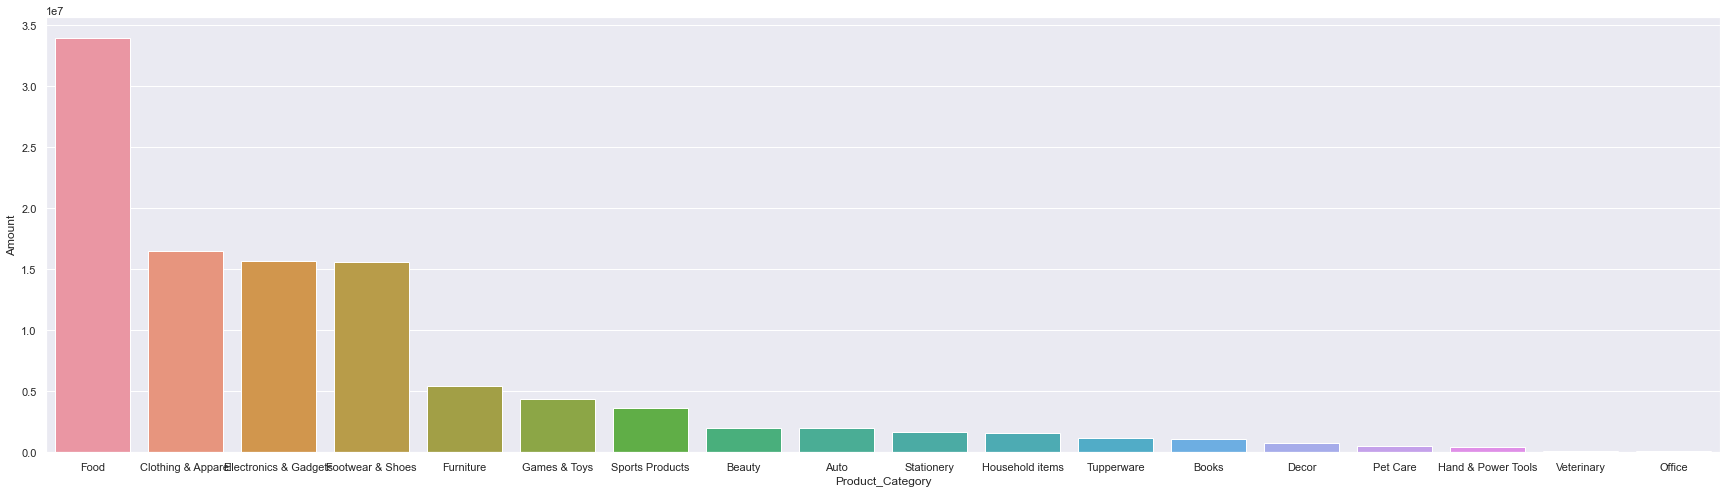

In [29]:
sns.set(rc={'figure.figsize':(30,8)})
product_amount = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.barplot(data = product_amount , x='Product_Category', y='Amount')


Food, Clothing & apparel , Electronic devices and Footwear & shoes and the top performing product category.

# Conclusion

After performing the analysis the following insights have been generated about the consumers and sales :

1)Majority of the customers are female , who are between the age group 26-35 and work in IT , Health care and Aviation.
2)The top 3 states for highest sales are UP , Maharastra and Karnataka.
3)The product categories that has got highest sales are Food, Clothing & apparel ,Electronic devices and Footware & shoes. 